In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
extra = data[data.duplicated()]
extra.shape

(240, 12)

In [12]:
y = data.quality
X = data.drop('quality', axis=1)
print(y.shape, X.shape)

(1599,) (1599, 11)


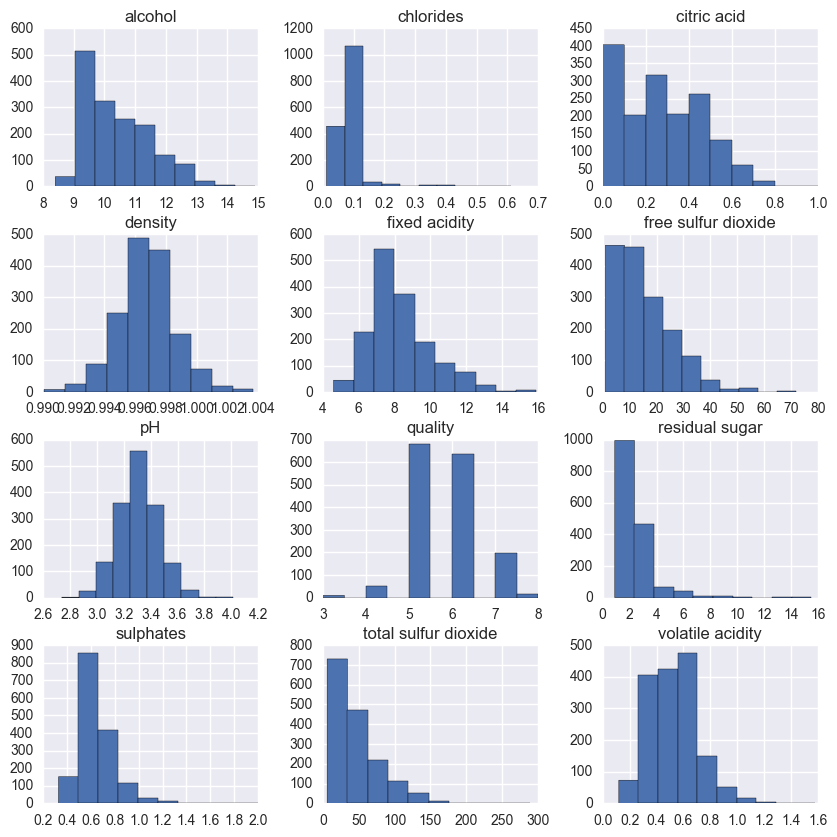

In [13]:
sns.set()
data.hist(figsize=(10,10))
plt.show()

In [14]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True)

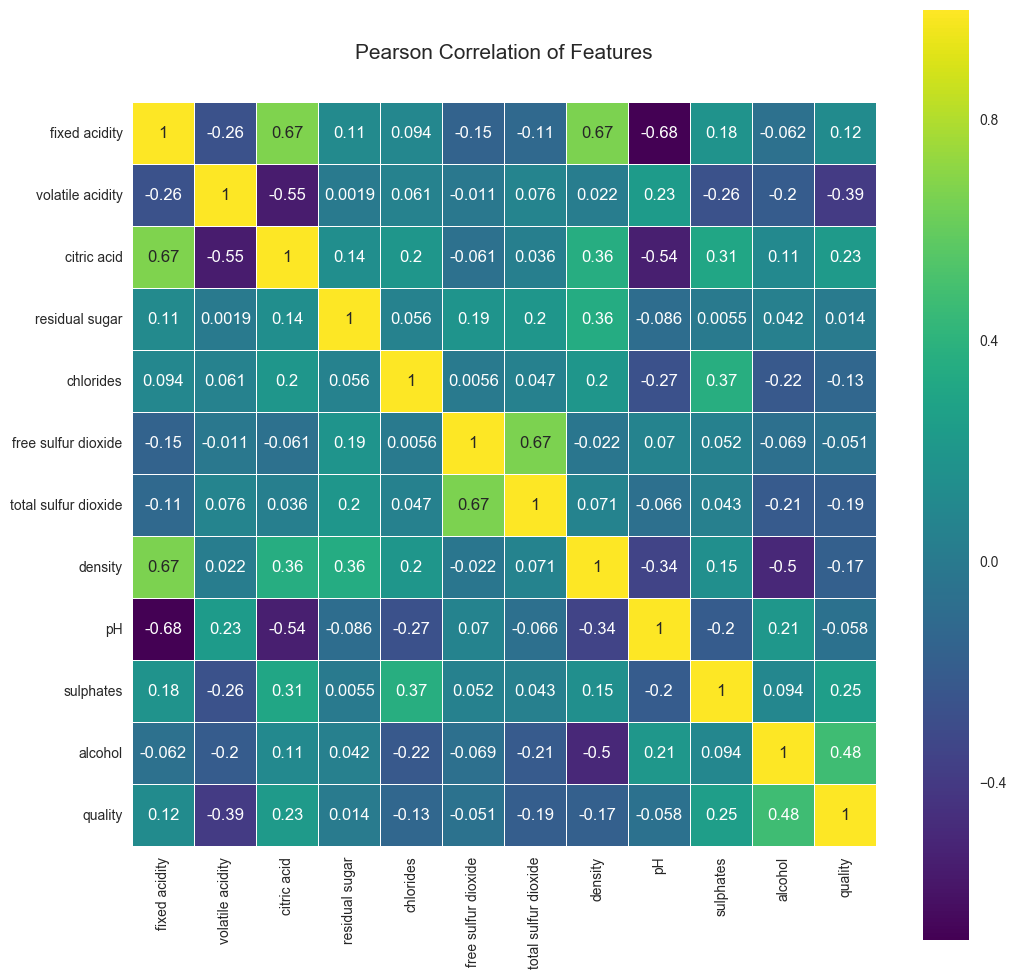

In [15]:
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [17]:
seed = 8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


In [20]:
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
print(RF_clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [21]:
predictions = RF_clf.predict(X_test)

In [22]:
for i in range(5):
    print('Actual wine quality is ', y_test.iloc[1], ' and predicted is ', predictions[i])

Actual wine quality is  5  and predicted is  5
Actual wine quality is  5  and predicted is  6
Actual wine quality is  5  and predicted is  6
Actual wine quality is  5  and predicted is  6
Actual wine quality is  5  and predicted is  6


In [24]:
print('Training Accuracy ::', accuracy_score(y_train, RF_clf.predict(X_train)))
print('Test Accuracy ::', accuracy_score(y_test, predictions))

Training Accuracy :: 0.988272087568
Test Accuracy :: 0.68125


In [25]:
print(confusion_matrix(y_test, predictions))

[[  0   1   3   0   0   0]
 [  0   0   4   6   0   0]
 [  0   2 109  23   3   0]
 [  0   1  31  89   8   0]
 [  0   0   1  16  20   0]
 [  0   0   0   1   2   0]]


In [26]:
y1 = y > 5
y1.head()

0    False
1    False
2    False
3     True
4    False
Name: quality, dtype: bool

In [27]:
np.count_nonzero(y1)

855

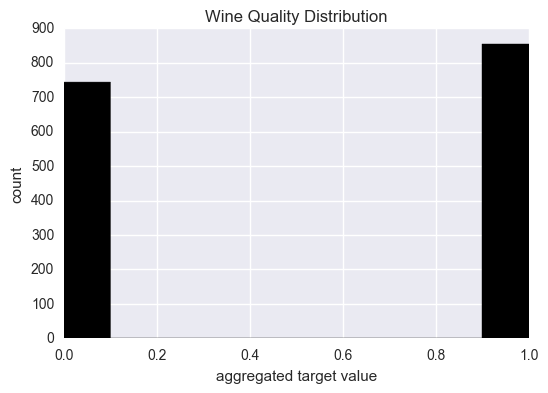

In [28]:
plt.figure()
plt.title('Wine Quality Distribution')
plt.hist(y1, color = 'black')
plt.xlabel('aggregated target value')
plt.ylabel('count')
plt.show()

In [29]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.2, random_state = seed)

In [30]:
print(X_train.shape, X_test.shape, y1_train.shape, y1_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


In [31]:
RF_clf1 = RandomForestClassifier()
RF_clf1.fit(X_train, y1_train)
print(RF_clf1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [32]:
predictions1 = RF_clf1.predict(X_test)

In [33]:
for i in range(5):
    print('Actual wine quality is ', y1_test.iloc[i], ' and predicted is ', predictions[i])

Actual wine quality is  False  and predicted is  5
Actual wine quality is  False  and predicted is  6
Actual wine quality is  True  and predicted is  6
Actual wine quality is  True  and predicted is  6
Actual wine quality is  True  and predicted is  6


In [35]:
print('Training Accuracy ::', accuracy_score(y1_train, RF_clf1.predict(X_train)))
print('Test Accuracy ::', accuracy_score(y1_test, predictions1))

Training Accuracy :: 0.990617670055
Test Accuracy :: 0.7875


In [36]:
print(confusion_matrix(y1_test, predictions))

[[  0   0   3 116  29   3]
 [  0   0   1  32 106  30]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]
